# Examples

In [1]:
%cd ..

/Users/bdhammel/Documents/insight/harvesting


In [2]:
%matplotlib inline

import warnings
warnings.simplefilter("ignore", RuntimeWarning)
warnings.simplefilter("ignore", FutureWarning)

import numpy as np
import matplotlib.pyplot as plt
import keras
import os

from pipeline import utils as pipe_utils
from pipeline.raw_data import utils as clean_utils
from models import patch_identifier

PROJ_DIR = os.getcwd()
test_image_path = os.path.join(PROJ_DIR, 'datasets/raw_images/test_patch.jpg')
model_path = os.path.join(PROJ_DIR, 'models/saved_models/patch_identifier.h5')

Using TensorFlow backend.


## Train the MSM on the UC Merced aerial data

In [3]:
#patch_identifier.train()

Uncommenting the above line will give you something of the sorts:
```
Epoch 1/5
335/335 [==============================] - 55s 165ms/step - loss: 1.1985 - acc: 0.5403
Epoch 2/5
335/335 [==============================] - 65s 193ms/step - loss: 0.6123 - acc: 0.8060
Epoch 3/5
335/335 [==============================] - 67s 201ms/step - loss: 0.4839 - acc: 0.8358
Epoch 4/5
335/335 [==============================] - 65s 193ms/step - loss: 0.2485 - acc: 0.9254
Epoch 5/5
335/335 [==============================] - 63s 188ms/step - loss: 0.3570 - acc: 0.8985
Finished Training
165/165 [==============================] - 35s 210ms/step
Accuracy: 80.00%
```

(-0.5, 399.5, 399.5, -0.5)

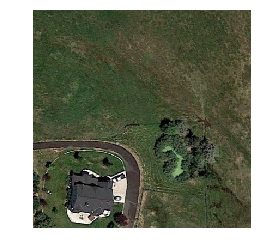

In [4]:
raw_img = clean_utils.read_raw_image(test_image_path, report=False)
plt.imshow(raw_img)
plt.axis('off')

In [5]:
model = patch_identifier.PatchIdentifier(model_path)

In [7]:
raw_batch = pipe_utils.as_batch(raw_img, shape=(200,200,3))
batch = pipe_utils.preprocess_image(raw_batch, use='patch')

In [8]:
predictions = model.predict(batch)

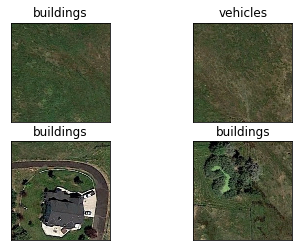

In [9]:
f, axes = plt.subplots(2,2)
labels = pipe_utils.ids_to_classes(predictions)
axes[0,0].imshow(raw_batch[0])
axes[0,0].set_title(labels[0])
axes[0,1].imshow(raw_batch[1])
axes[0,1].set_title(labels[1])
axes[1,0].imshow(raw_batch[2])
axes[1,0].set_title(labels[2])
axes[1,1].imshow(raw_batch[3])
axes[1,1].set_title(labels[3])

for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])